In [1]:
import os
n = 3
dir_name = f"DWA param Experiment final #{n}"
experiment_path = f'./data/{dir_name}'

if not os.path.exists(experiment_path):
    os.makedirs(experiment_path)
else:
    raise Exception(f"warning almost deleted old run #{n}")

In [4]:
from map_maker import cluttered_map, save_map
from Turtlebot_Kinematics import unicycleKin
from environment import Environment, load_ENV
from Runner import ControllMode, Runner
from dwa_controller import DWA_Controller

kinematic = unicycleKin()
run_len = 31
dt = 0.16
max_index = None
dwa_horizon = 3.5

# map parameters
map_obs = 8
map_size = 50
map_unknown = True
map_name = f"cluttered_{map_obs}obs_{map_size}x{map_size}_{'unknown' if map_unknown else 'known'}"

'''#param lists
obst_params = [4]*9
goal_params = [1,2,4]*3 #heading actually
speed_params = [1]*3 + [2]*3 + [4]*3
param_list = list([(obst_params[i], goal_params[i], speed_params[i]) for i in range(9)])'''

#param lists
obst_params = [4]*9
goal_params = [1/3, 1/2, 3/4]*3 #heading actually
speed_params = [1]*3 + [2]*3 + [3]*3
param_list = list([(obst_params[i], round(goal_params[i] * speed_params[i], 1), speed_params[i]) for i in range(9)])

In [5]:

for i in range(run_len):
    run_path = f"{experiment_path}/map {i+1}"
    if not os.path.exists(run_path):
        os.makedirs(run_path)
        
    run_map = cluttered_map(map_obs, map_size, map_unknown)
    map_path = f"{run_path}/{map_name}"
    save_map(run_map, map_name, run_path)

    for obst, goal, speed in param_list:
        # run and save MultiPSO data
        DWA_ENV = Environment.from_dict(run_map, kinematic, record=True)
        DWA_controller = DWA_Controller(20, kinematic, virtual_dt=dwa_horizon)
        DWA_Controller.dist_koeff = -obst
        DWA_Controller.heading_koeff = goal
        DWA_Controller.speed_koeff = speed
        if max_index is None:
            max_index = DWA_ENV.goal_travel_time / dt + 200
        else: max_index = max(max_index, DWA_ENV.goal_travel_time / dt + 200)
        DWA_Runner = Runner(
            DWA_ENV, 
            ControllMode.DWA, 
            DWA_controller, 
            max_step = max_index,
            dt = dt,
            save_path= f"{run_path}/{obst}_{goal}_{speed}"
        )
        DWA_Runner.loop()



# 1
best: 1.2999587717199752 (15.0, -0.047368421052631615)
is unyKin
stepping (15.0, 0.047368421052631615)
offset [0. 0. 0.]
# 2
best: 1.299986060321212 (15.0, 0.047368421052631615)
is unyKin
stepping (15.0, -0.047368421052631615)
offset [0. 0. 0.]
# 3
best: 1.2999650717670514 (15.0, 0.047368421052631615)
is unyKin
stepping (15.0, -0.047368421052631615)
offset [0. 0. 0.]
# 4
best: 1.2999810809023182 (15.0, -0.047368421052631615)
is unyKin
stepping (15.0, 0.047368421052631615)
offset [0. 0. 0.]
# 5
best: 1.2999587717199752 (15.0, -0.047368421052631615)
is unyKin
stepping (15.0, 0.047368421052631615)
offset [0. 0. 0.]
# 6
best: 1.2999854533723854 (15.0, 0.047368421052631615)
is unyKin
stepping (15.0, -0.047368421052631615)
offset [0. 0. 0.]
# 7
best: 1.1407345051020124 (15.0, 0.9)
is unyKin
stepping (15.0, -0.9)
offset [0. 0. 0.]
# 8
best: 0.9860155614250256 (15.0, 0.9)
is unyKin
stepping (15.0, -0.9)
offset [0. 0. 0.]
# 9
best: 0.8025886943025269 (15.0, 0.9)
is unyKin
stepping (15.0, -0

KeyboardInterrupt: 

In [ ]:
import json

info_dict = {
    "kinematic_model": str(type(kinematic)),
    "run_len": run_len,
    "dt": dt,
    "max_index": max_index,
    "map_obs": map_obs,
    "map_size": map_size,
    "map_unknown": map_unknown
}

with open(f"{experiment_path}/info.json", "w") as file:
    json.dump(info_dict, file, indent=2)

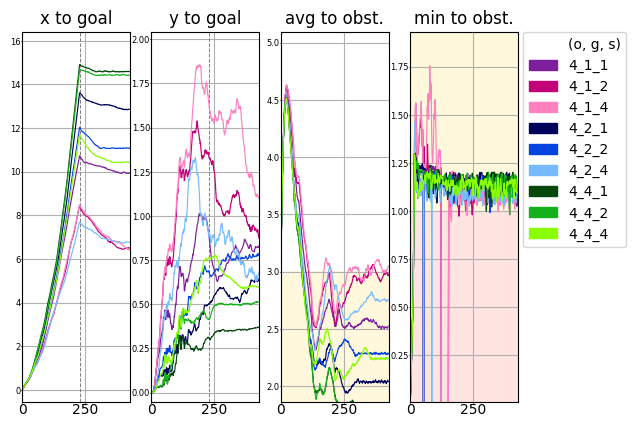

In [ ]:
import graphical_evaluation as ge
from graphical_evaluation import read_data, plot_data_dict
import matplotlib.pyplot as plt

depth = 1

ge.MAX_INDEX = int(max_index)
ge.DT = dt

data_dict = read_data(f"./data/{dir_name}", depth)
plot_data_dict(data_dict, depth, fig_name=dir_name, color_dict={})
plt.show()